# 이미지 분류 연습 문제

### 이미지 분류 작업
- (1) 데이터 준비
- (2) 이미지 데이터 전처리 / 시각화
- (3) 모델링
- (4) 결과 시각화
- (5) 모델 저장 / 로드
- (6) 예측(predict)

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [15]:
import numpy as np

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# data load
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
# 데이터 세트 쉐입 확인
X_train.shape
y_train.shape
X_test.shape 
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [24]:
 y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

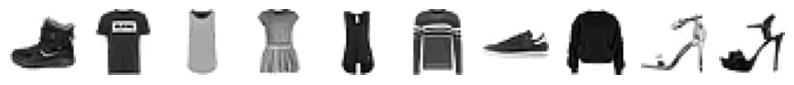

In [53]:
# 시각화 해서 확인
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap=plt.cm.binary)
    axs[i].axis('off')   # 테두리없애기
    
plt.show()

## 이미지 데이터 전처리 / 시각화

In [20]:
# 차원 변환 및 정규화
# 차원 : 3D (60000, 28, 28) -> (60000, 784) 2D
# 정규화 : np.min(X_train), np.max(X_train) # 픽셀 값 0~255

X_train2 = X_train.reshape(60000, 28*28) / 255

X_test2 = X_test.reshape(10000, 28*28) / 255

In [25]:
# 변환 후 데이터 shape확인
X_train2.shape
X_test2.shape

(60000, 784)

(10000, 784)

In [28]:
# label 값 원-핫 인코딩

# 인코딩 전
y_train[:10] # 숫자형

# 인코딩
from keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

# 인코딩 후
y_test2[:4]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델링

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델설정
# 보통 softmax는 출력층에서
model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [51]:
# (2) 컴파일
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [52]:
# (3) 모델 학습
history = model.fit(x=X_train2, y=y_train2, epochs=100, batch_size=128,
                    validation_data=(X_test2, y_test2))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.5619 - accuracy: 0.8016 - val_loss: 0.4221 - val_accuracy: 0.8508
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3791 - accuracy: 0.8609 - val_loss: 0.3668 - val_accuracy: 0.8701
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3353 - accuracy: 0.8758 - val_loss: 0.3604 - val_accuracy: 0.8696
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3092 - accuracy: 0.8870 - val_loss: 0.3959 - val_accuracy: 0.8592
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2886 - accuracy: 0.8940 - val_loss: 0.3565 - val_accuracy: 0.8760
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2759 - accuracy: 0.8979 - val_loss: 0.3681 - val_accuracy: 0.8738
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2625 - accuracy: 0.9038 - val_loss: 0.3497 - val_accuracy: 0.8750

Epoch 58/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9707 - val_loss: 0.7166 - val_accuracy: 0.8961
Epoch 59/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9722 - val_loss: 0.7592 - val_accuracy: 0.8922
Epoch 60/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0815 - accuracy: 0.9724 - val_loss: 0.6988 - val_accuracy: 0.8912
Epoch 61/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9719 - val_loss: 0.7232 - val_accuracy: 0.8914
Epoch 62/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0814 - accuracy: 0.9731 - val_loss: 0.7604 - val_accuracy: 0.8894
Epoch 63/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9742 - val_loss: 0.7326 - val_accuracy: 0.8947
Epoch 64/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9748 - val_loss: 0.7385 - val_accuracy:

In [54]:
# (4) 모델 평가
loss, accuracy = model.evaluate(X_test2, y_test2)
print(f'정확도 : {accuracy}, 손실률 : {loss}')

# epoch 1000
# loss: 0.9743 - accuracy: 0.8336 과적합 나옴

# epoch 100 rulu, softmax
# 정확도 : 0.8924000263214111, 손실률 : 1.000217080116272

313/313 [==============================] - 0s 1ms/step - loss: 1.0002 - accuracy: 0.8924
정확도 : 0.8924000263214111, 손실률 : 1.000217080116272


## 결과 시각화 

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

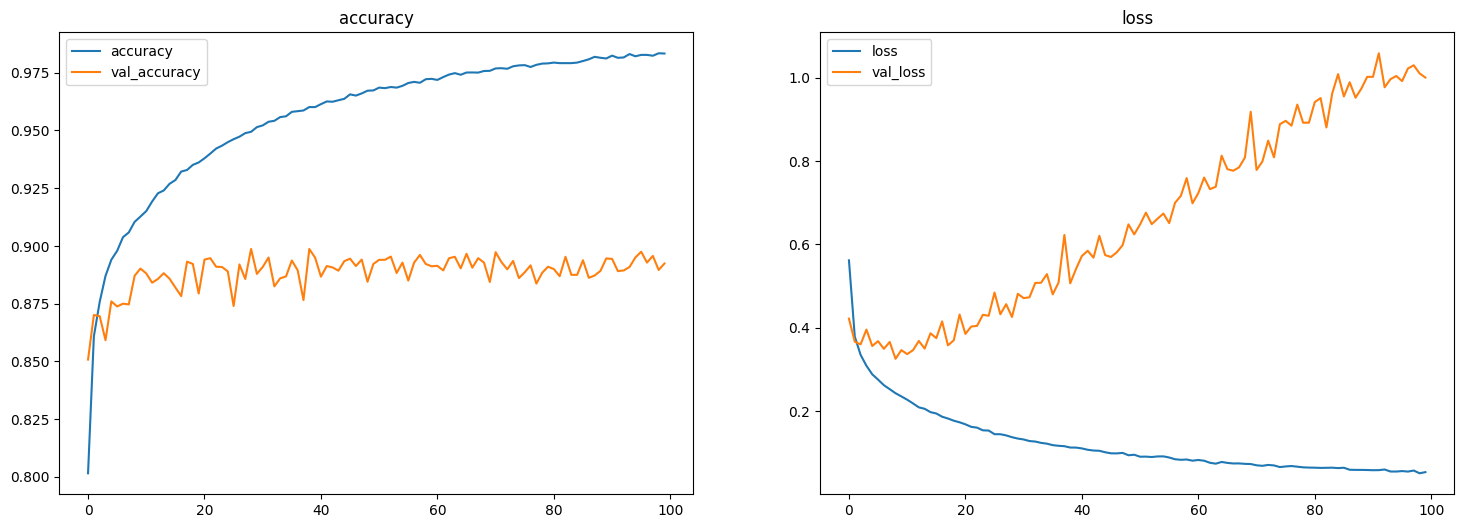

In [55]:
plt.figure(figsize=(18,6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

## 모델 저장 / 로드 

In [38]:
model.save('../../data/06_model.keras')

In [41]:
from tensorflow.keras.models import load_model
loaded_model = load_model('../../data/06_model.keras')

## 예측

In [47]:
y_pre_prob = loaded_model.predict(X_test2, verbose=0) # 예측
y_pred = y_pre_prob.argmax(axis=1)

# 예측, 테스트 데이터 라벨 값 비교
y_pred[:10]
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
